In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rioxarray as rxr
import earthpy as et
import earthpy.plot as ep
import xarray as xr

from sklearn.preprocessing import StandardScaler   
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import seaborn as sns

In [4]:
penguins_df = sns.load_dataset("penguins")

penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [8]:
penguins_df = sns.load_dataset("penguins").dropna()

penguins_df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

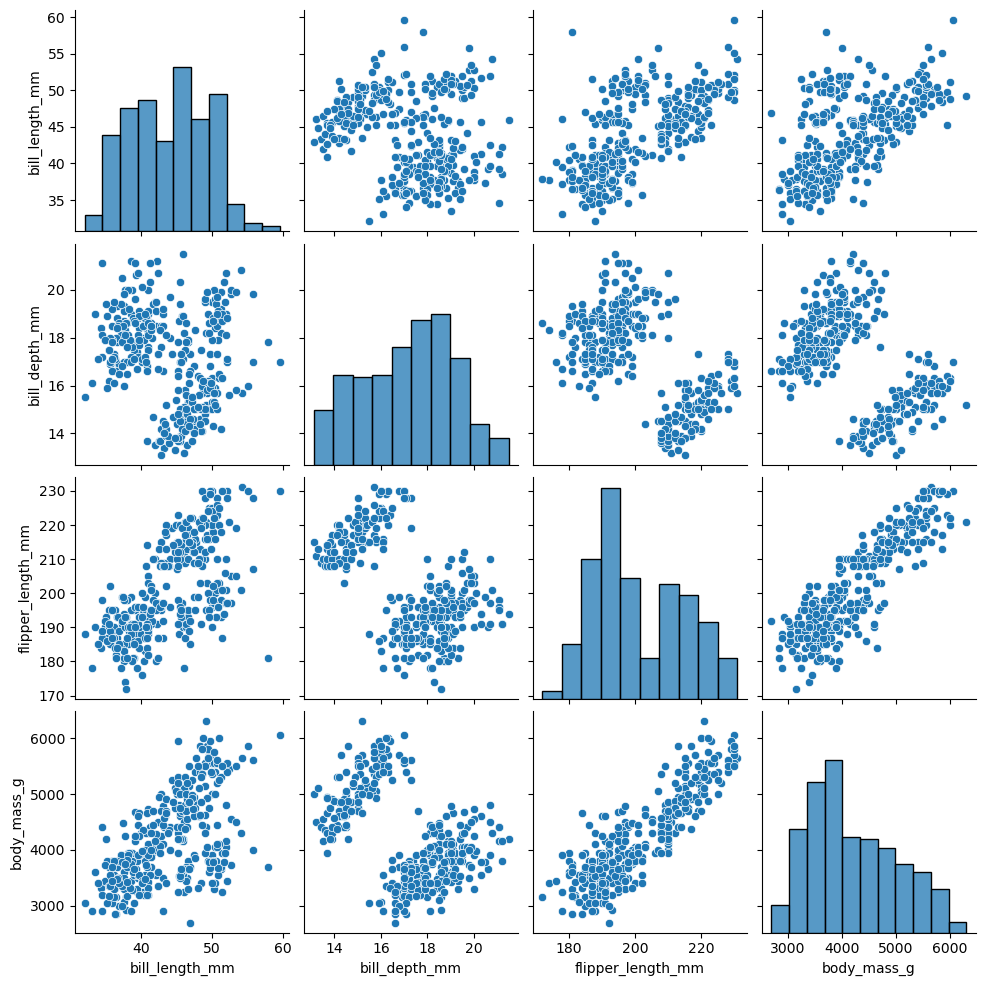

In [15]:

sns.pairplot(penguins_df)

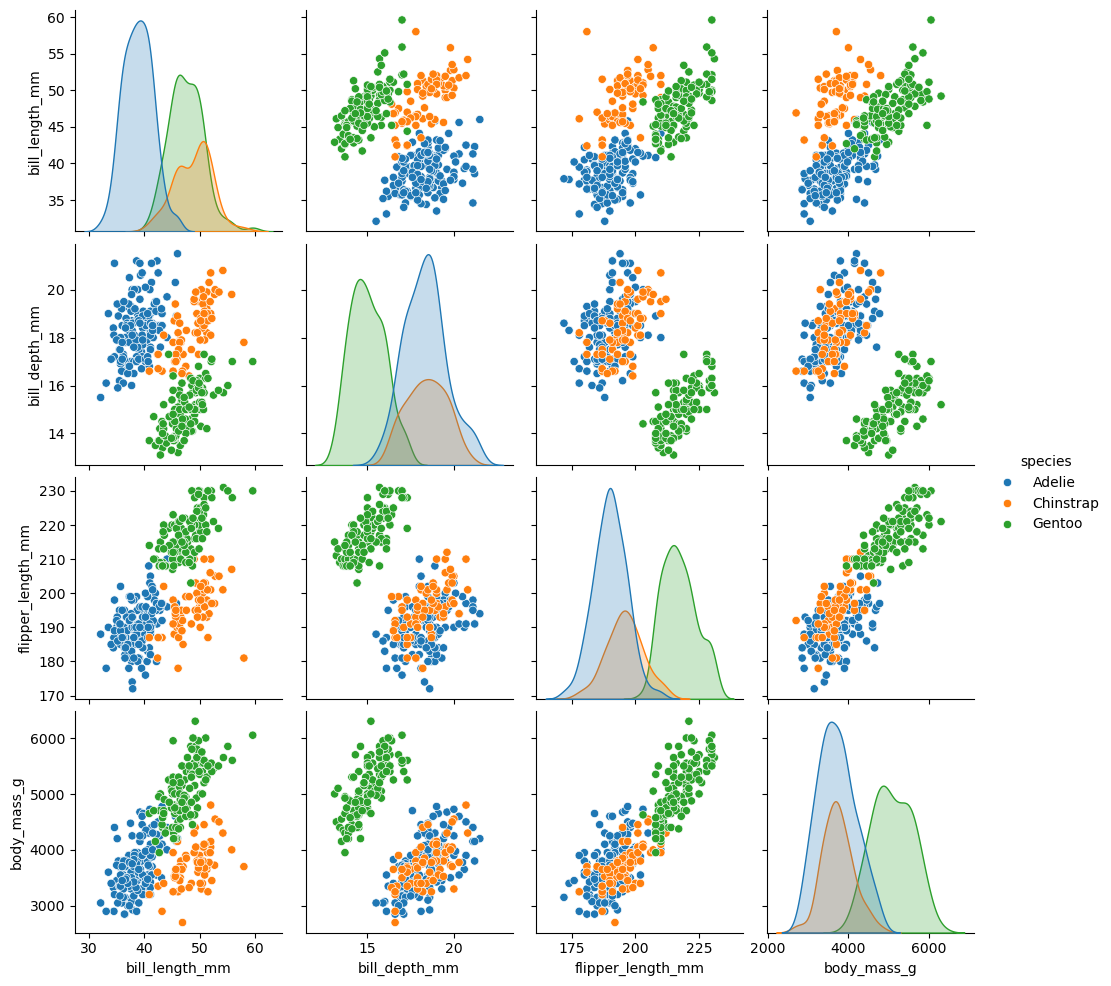

In [13]:
# data vis

np.unique(penguins_df.species)

sns.pairplot(penguins_df, hue="species")

In [18]:
# k-means model

k_means = KMeans(n_clusters=3, random_state=42)

k_means.fit(penguins_df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]])

penguins_df["k_means_labels"] = k_means.labels_
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,k_means_labels
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,1


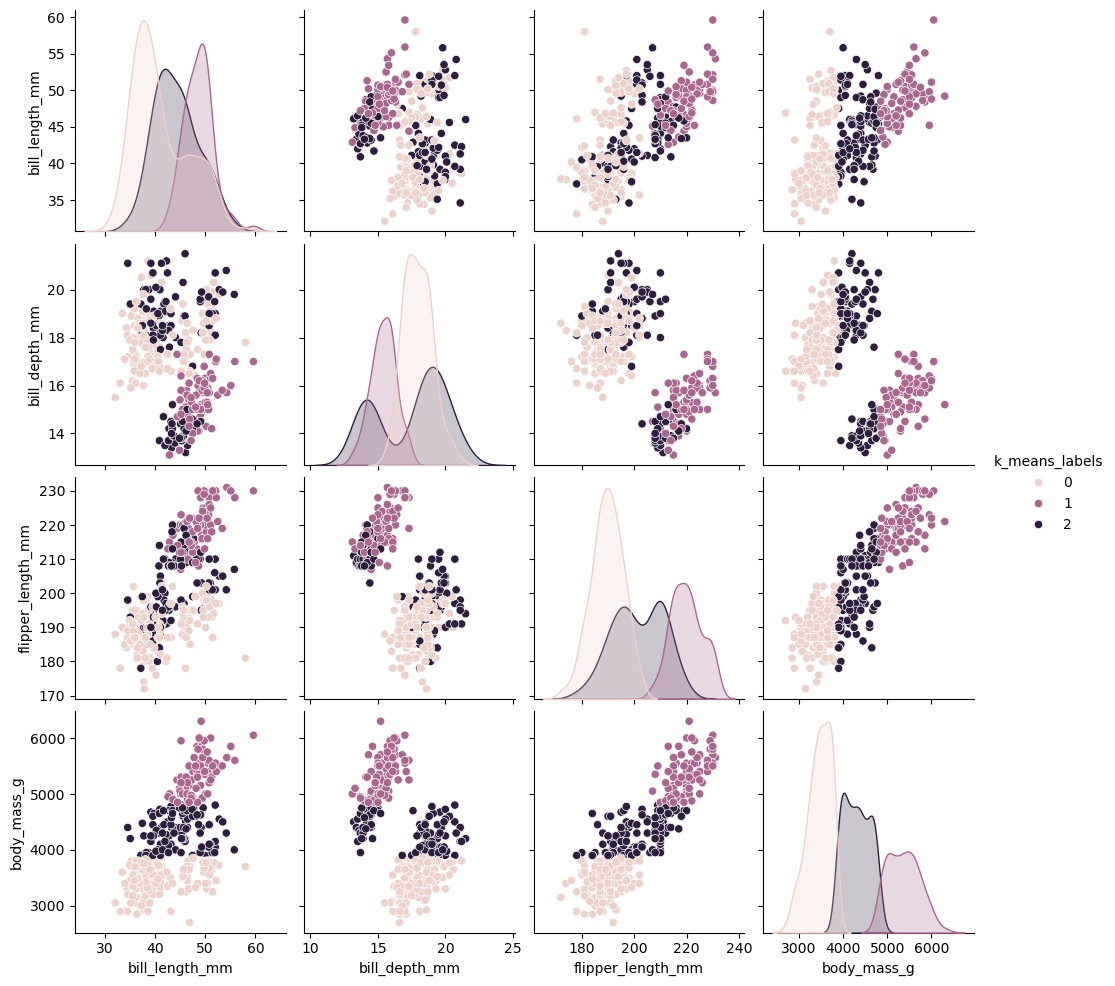

In [19]:
# visualize by k-means labels

sns.pairplot(penguins_df, hue="k_means_labels")

In [22]:
# k-means2 model

k_means2 = KMeans(n_clusters=3, random_state=42)

k_means2.fit(penguins_df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]])

penguins_df["k_means2_labels"] = k_means2.labels_
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,k_means_labels,k_means2_labels
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,2
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,2
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0,2
...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,1,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,1,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,1,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,1,1


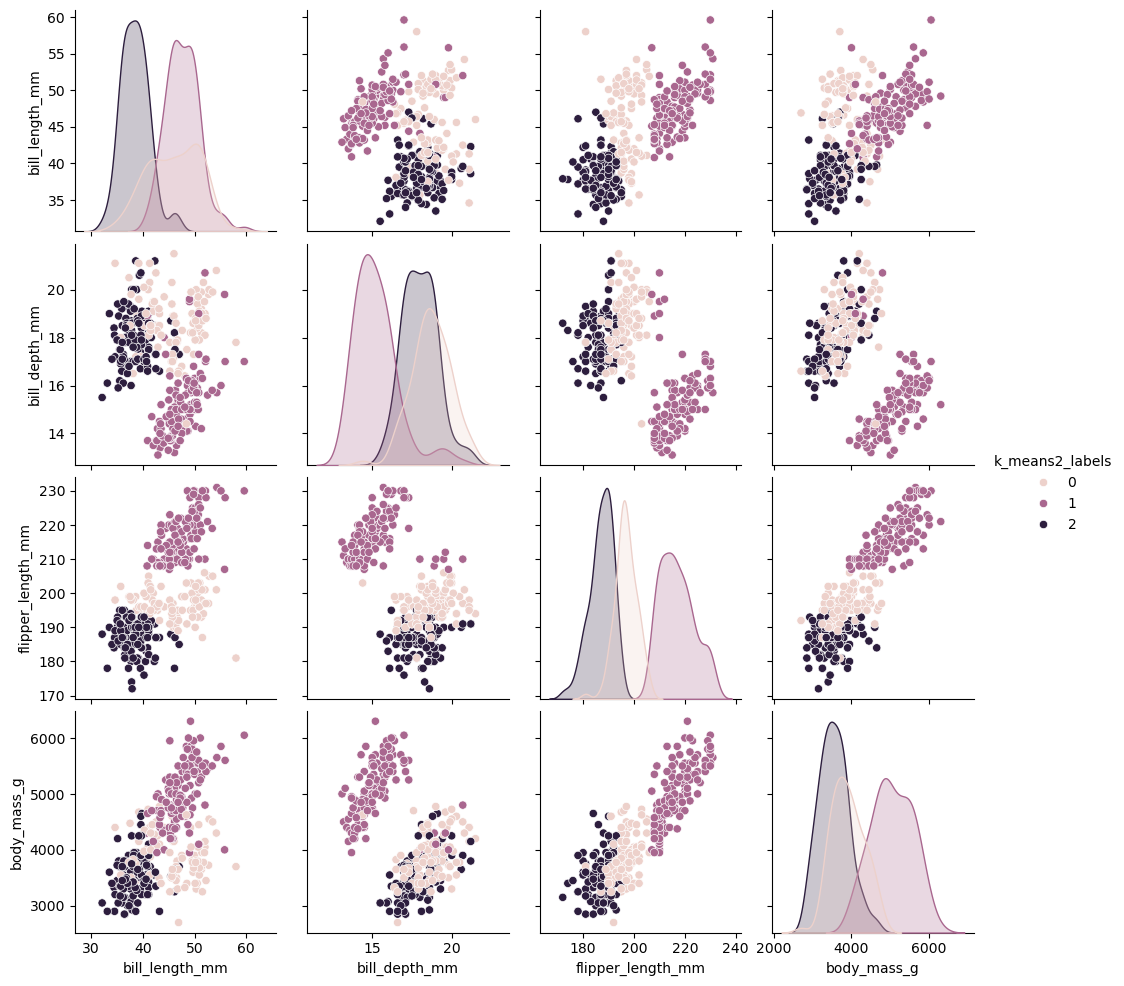

In [23]:
sns.pairplot(penguins_df, hue="k_means2_labels", vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", 'body_mass_g'])

In [35]:
# PCA

pca = PCA()

#fit 
pca.fit(penguins_df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]])

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [36]:
pca.components_

array([[ 0.26583918, -0.07693674,  0.96094238],
       [ 0.95753345,  0.13649137, -0.2539681 ],
       [-0.11162086,  0.98764915,  0.10995426]])

In [37]:
pca.explained_variance_ratio_

array([0.91895303, 0.07070604, 0.01034093])

In [39]:
# extract first PCA
b = pca.components_[0]
b

# add PCA to dataframe
penguins_df["pca_1"] = penguins_df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]].dot(b)

penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,k_means_labels,k_means2_labels,pca_1,k_meansPCA_labels,k_meansPCA6_labels
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,2,182.886167,0,4
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,2,187.897232,0,4
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,0,196.712223,0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,2,193.733299,0,4
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0,2,191.441636,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,1,1,217.135246,1,3
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,1,1,217.943691,1,3
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,1,1,225.519597,1,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,1,1,214.597053,1,3


In [40]:
# k-means2 model

k_meansPCA = KMeans(n_clusters=3, random_state=42)

k_meansPCA.fit(penguins_df[["pca_1"]])

penguins_df["k_meansPCA_labels"] = k_meansPCA.labels_
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,k_means_labels,k_means2_labels,pca_1,k_meansPCA_labels,k_meansPCA6_labels
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,2,182.886167,0,4
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,2,187.897232,0,4
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,0,196.712223,2,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,2,193.733299,2,4
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0,2,191.441636,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,1,1,217.135246,1,3
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,1,1,217.943691,1,3
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,1,1,225.519597,1,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,1,1,214.597053,1,3


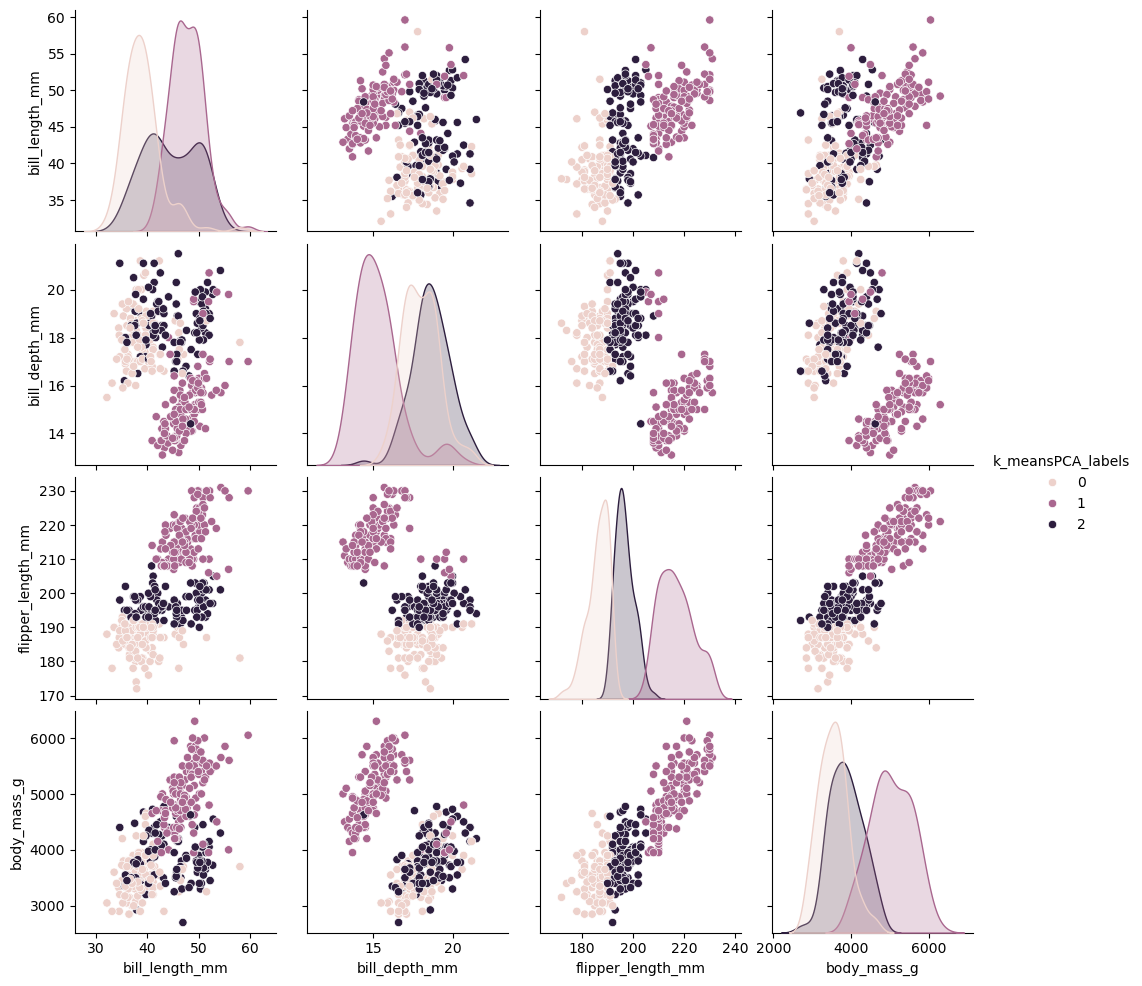

In [41]:
sns.pairplot(penguins_df, hue="k_meansPCA_labels", vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", 'body_mass_g'])

In [33]:
# k-means2 model

k_meansPCA6 = KMeans(n_clusters=6, random_state=42)

k_meansPCA6.fit(penguins_df[["pca_1"]])

penguins_df["k_meansPCA6_labels"] = k_meansPCA6.labels_
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,k_means_labels,k_means2_labels,pca_1,k_meansPCA_labels,k_meansPCA6_labels
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,2,3752.419687,0,4
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,2,3802.492555,0,4
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,0,3252.700084,0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,2,3452.628958,0,4
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0,2,3652.567458,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,1,1,4927.813459,1,3
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,1,1,4852.835669,1,3
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,1,1,5752.843115,1,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,1,1,5202.739660,1,3


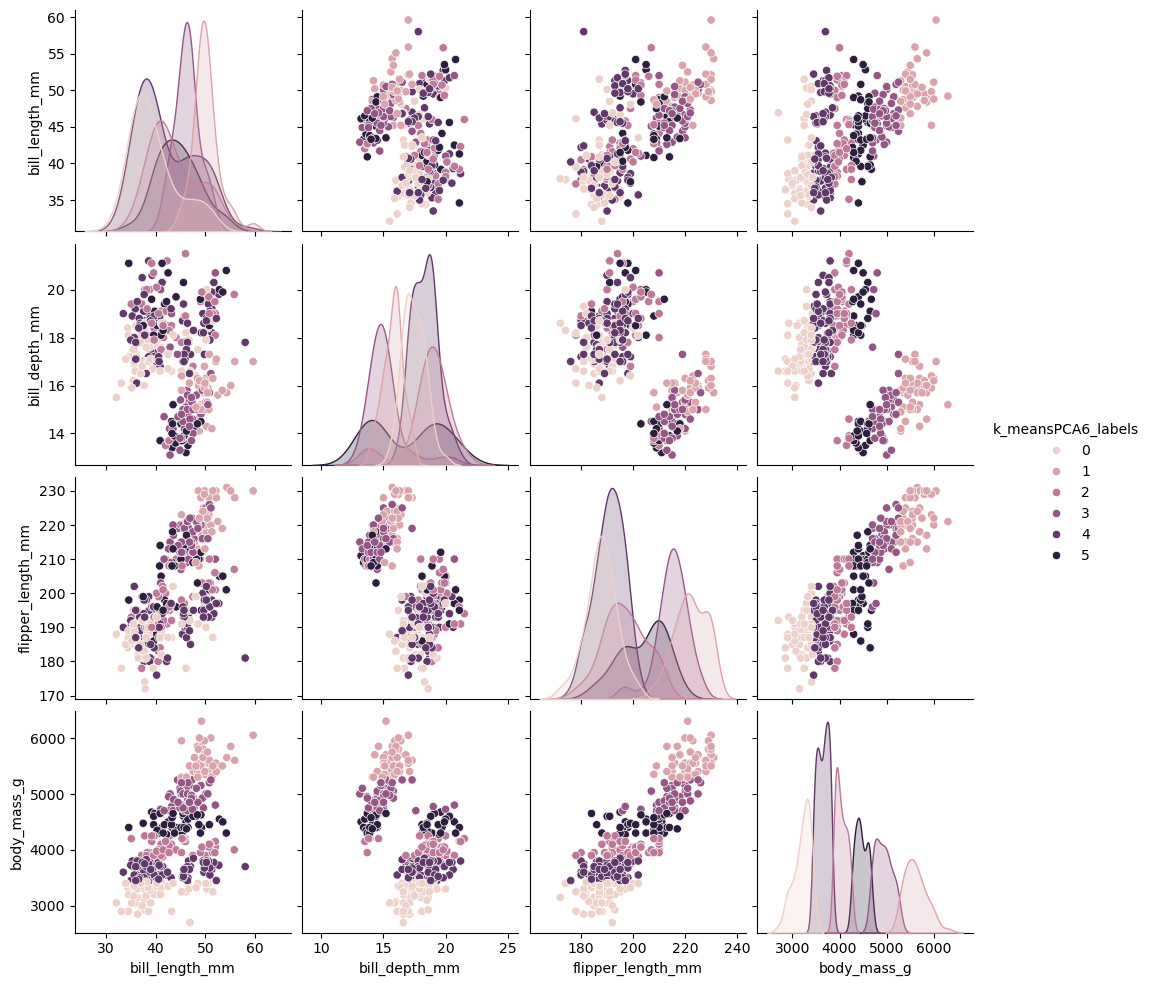

In [34]:
sns.pairplot(penguins_df, hue="k_meansPCA6_labels", vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", 'body_mass_g'])

In [44]:
silhouette = []

k_list = list(range(2,20))

for k in k_list:
    kmeans = KMeans(n_clusters = k, random_state=42)

    model_vars = penguins_df[["pca_1"]]

    kmeans.fit(model_vars)

    silhouette.append(silhouette_score(model_vars, kmeans.labels_))

silhouette

[0.6788385958859339,
 0.5720658179620112,
 0.5624138093072225,
 0.5484879887146512,
 0.5344156263522731,
 0.539520831572495,
 0.543804061162554,
 0.5475325965429583,
 0.5421860561026545,
 0.5499514014711764,
 0.5532613666614313,
 0.5473691414305722,
 0.552277797718373,
 0.5434049311236766,
 0.5463131377915391,
 0.5501980793054688,
 0.5479526770236177,
 0.5697264078514912]

Text(0.5, 1.0, 'Silhouette Score vs. Number of Clusters (k)')

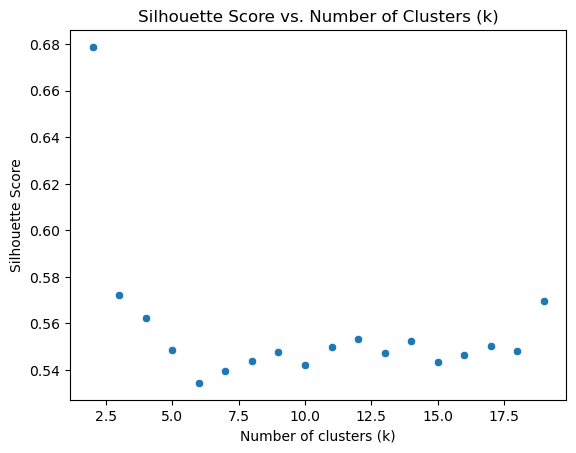

In [45]:
sns.scatterplot(x=k_list, y=silhouette)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters (k)")